In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
separate_idx = train.shape[0]
df = pd.concat([train, test])

In [115]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [120]:
train.isnull().sum()[train.isnull().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [128]:
cols_to_drop = ['Id', 'PoolQC', 'Fence', 'MiscFeature', 'Alley']
for col in cols_to_drop:
    df.drop(col, axis=1, inplace=True)

In [147]:
category_cols_na = df.dtypes[df.isnull().sum()!=0][train.dtypes=='object'].keys()
category_cols_na

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual',
       'Functional', 'SaleType'],
      dtype='object')

In [148]:
fillna_with_mode = lambda col: df[col].fillna(train[col].mode()[0])
for col in category_cols_na:
    df[col] = fillna_with_mode(col)

df['GarageYrBlt'] = fillna_with_mode('GarageYrBlt')

In [131]:
numerical_cols = ['LotFrontage', 'MasVnrArea']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [142]:
numerical_cols = df.dtypes[df.isnull().sum()!=0][df.dtypes=='float'].keys().tolist()
numerical_cols.remove('SalePrice')
numerical_cols
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())

In [170]:
sub = pd.read_csv("./sample_submission.csv")
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


<AxesSubplot:>

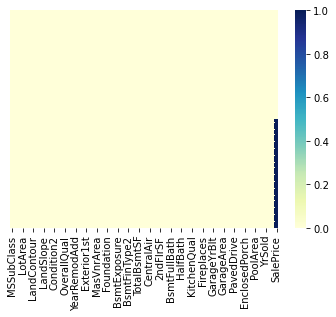

In [149]:
sns.heatmap(df.isnull(), yticklabels=False, cmap='YlGnBu')

In [150]:
df.dtypes[df.isnull().sum()>0]

SalePrice    float64
dtype: object

In [151]:
def mystery(cols):
    df_final = final_df
    i = 0
    for col in cols:
        print(col)
        df1 = pd.get_dummies(final_df[col], drop_first=True)
        final_df.drop([col], axis=1, inplace=True)
        if i==0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final, df1], axis=1)
        i += 1
        
    df_final = pd.concat([final_df, df_final], axis=1)
    return df_final
          

In [152]:
main_df = train.copy()

In [153]:
final_df = df

In [154]:
final_df = mystery(category_cols)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [155]:
final_df.shape

(2919, 237)

In [106]:
for c in final_df.columns:
    print(c)

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
FV
RH
RL
RM
Pave
IR2
IR3
Reg
HLS
Low
Lvl
NoSeWa
CulDSac
FR2
FR3
Inside
Mod
Sev
Blueste
BrDale
BrkSide
ClearCr
CollgCr
Crawfor
Edwards
Gilbert
IDOTRR
MeadowV
Mitchel
NAmes
NPkVill
NWAmes
NoRidge
NridgHt
OldTown
SWISU
Sawyer
SawyerW
Somerst
StoneBr
Timber
Veenker
Feedr
Norm
PosA
PosN
RRAe
RRAn
RRNe
RRNn
Feedr
Norm
PosA
PosN
RRAe
RRAn
RRNn
2fmCon
Duplex
Twnhs
TwnhsE
1.5Unf
1Story
2.5Fin
2.5Unf
2Story
SFoyer
SLvl
Gable
Gambrel
Hip
Mansard
Shed
CompShg
Membran
Metal
Roll
Tar&Grv
WdShake
WdShngl
AsphShn
BrkComm
BrkFace
CBlock
CemntBd
HdBoard
ImStucc
MetalSd
Plywood
Stone
Stucco
VinylSd
Wd Sdng
WdS

In [156]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [157]:
train = final_df.iloc[:separate_idx, :]
test = final_df.iloc[separate_idx:, :]

In [160]:
test.drop(['SalePrice'], axis=1, inplace=True)

/Users/jess/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [161]:
test.shape

(1459, 176)

In [162]:
train.shape

(1460, 177)

In [164]:
X_train=train.drop(['SalePrice'],axis=1)
y_train=train['SalePrice']

In [167]:
import xgboost
regressor = xgboost.XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [166]:
!pip install xgboost

     |████████████████████████████████| 1.3 MB 299 kB/s            


In [168]:
y_pred = regressor.predict(test)

In [169]:
y_pred

array([117078.305, 158027.02 , 192898.2  , ..., 161972.14 , 106366.914,
       235371.14 ], dtype=float32)

In [177]:
np.sqrt(sum((sub['SalePrice'] - y_pred) ** 2) / len(y_pred))

74547.1734034217

In [182]:
result = pd.Series(y_pred, index=range(1461, 1461+len(y_pred)))

In [196]:
result = pd.DataFrame({"Id":range(1461, 1461+len(y_pred)), "SalePrice": y_pred})
result

,Id,SalePrice
0,1461,117078.304688
1,1462,158027.015625
2,1463,192898.203125
3,1464,187861.484375
4,1465,194023.718750
...,...,...
1454,2915,82661.195312
1455,2916,86054.054688
1456,2917,161972.140625
1457,2918,106366.914062


In [198]:
result.to_csv("result.csv", index=False)

In [191]:
pd.DataFrame?